In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
import sklearn

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

! mp config

Package        Version
-------------  --------------------------------
metapack       0.9.19.post0.dev3+g9882a2f.dirty
metatab        0.8.1
metatabdecl    1.9
rowgenerators  0.9.6
tableintuit    0.1.6

Subcommand    Package
------------  -----------------------------------------
wp            metapack-wp 0.0.9
notebook      metapack-jupyter 0.0.3
config        metapack 0.9.19.post0.dev3+g9882a2f.dirty
doc           metapack 0.9.19.post0.dev3+g9882a2f.dirty
index         metapack 0.9.19.post0.dev3+g9882a2f.dirty
info          metapack 0.9.19.post0.dev3+g9882a2f.dirty
open          metapack 0.9.19.post0.dev3+g9882a2f.dirty
run           metapack 0.9.19.post0.dev3+g9882a2f.dirty
search        metapack 0.9.19.post0.dev3+g9882a2f.dirty
build         metapack-build 0.0.16
colmap        metapack-build 0.0.16
edit          metapack-build 0.0.16
mk            metapack-build 0.0.16
new           metapack-build 0.0.16
s3            metapack-build 0.0.16
stats         metapack-build 0.0.16
update 

In [2]:
pkg = mp.open_package('http://library.metatab.org/jhu.edu-covid19-1.zip')
pkg

# COVID-19 Data
`jhu.edu-covid19-1` Last Update: 2020-03-22T04:01:21

_COVID 19 cases data from John-Hopkins, augmented and reformtted_


This dataset processed and augments the COVID-19 data provided by Johns Hopkins
University Center for Systems Science and Engineering (JHU CSSE). [The source
data is checked into Github
daily.](https://github.com/CSSEGISandData/COVID-19/) and is collected from a
variety of sources.

This dataset reformats the data into tidy format, with dates expressed as
values instead of column headings, and adds several fields that are useful for
analysis.

The 'rate_t5d' column is the growth date from 5 days before the observation to
the observation. For example, for a row with a current observation of value
x_5, and a past observation of x_0, the rate_t5d is calculated as
e^((log(x_5)-log(x_0_)) / 5)-1 . The result is that x_5 = x_0 * (1+rate_t5d)^5,
however, the rate valule is applied to the row of x_0; it is a forward loooking
rate.

## Caveats

* China's minimum cases in the dataset is 548, so it's value for days sincle
  100 cases is shifted by 6 days. It's just a guess, but it looks good. 
* Countries that haven't reached 100 cases yet will have a days since 100 cases
  value that is always negative.


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [confirmed](data/confirmed.csv)**. Confirmed cases by date and country
* ** [deaths](data/deaths.csv)**. Deaths cases by date and country
* ** [recovered](data/recovered.csv)**. Recoveries cases by date and country

## References
<ul><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/">ts_base_url</a></strong>. Base URL for time series data</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv">confirmed_ts_source</a></strong>. Source for time series of confirmed cases</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv">death_ts_source</a></strong>. Source for time series of deaths</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv">recov_ts_source</a></strong>. Source for time series of recoveries</li><ul>

In [3]:
confirmed_df = pkg.resource('confirmed').dataframe()
confirmed_df.head()

,country,province,location,date,confirmed,date_10,days_10,date_100,days_100,rate_t5d,confirmed_log
0,Thailand,NaN,Thailand,2020-01-27,8,2020-01-28,-1,2020-03-15,-48,0.319508,2.197225
1,Thailand,NaN,Thailand,2020-01-28,14,2020-01-28,0,2020-03-15,-47,0.360822,2.708050
2,Thailand,NaN,Thailand,2020-01-29,14,2020-01-28,1,2020-03-15,-46,0.228660,2.708050
3,Thailand,NaN,Thailand,2020-01-30,14,2020-01-28,2,2020-03-15,-45,0.148698,2.708050
4,Thailand,NaN,Thailand,2020-01-31,19,2020-01-28,3,2020-03-15,-44,0.188865,2.995732


Text(0, 0.5, 'Rate of Growth')

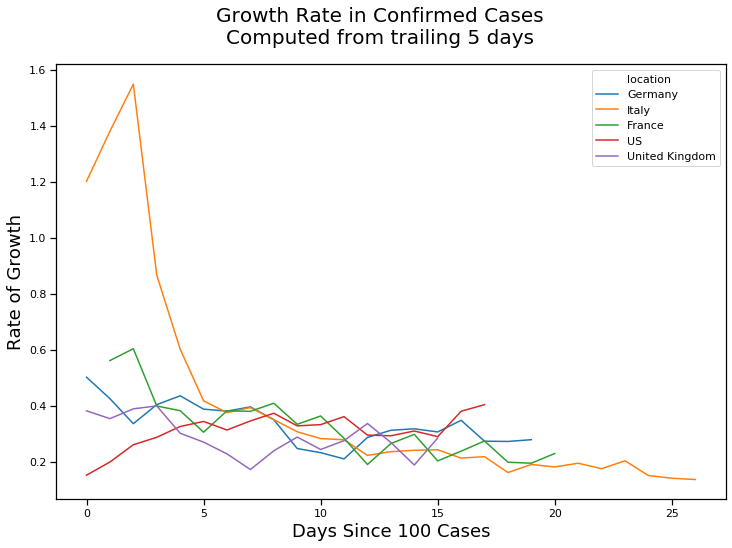

In [4]:

t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.confirmed>100)] 
t = t[t.location.isin( ['Italy','US','Germany','France', 'United Kingdom'])]

fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Growth Rate in Confirmed Cases\nComputed from trailing 5 days', fontsize=20)

sns.lineplot(ax=ax, x='days_100',y='rate_t5d', data=t, hue='location', ci=None)
ax.set_xlabel('Days Since 100 Cases', fontsize=18)
ax.set_ylabel('Rate of Growth', fontsize=18)



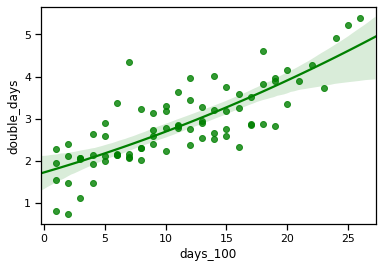

In [35]:
confirmed_df['double_days'] = np.log(2)/np.log(1+confirmed_df.rate_t5d)
confirmed_df.sort_values('double_days', ascending=False)

t = confirmed_df[(confirmed_df.days_100 > 0) & (confirmed_df.days_100 < 30) 
                 & (confirmed_df.double_days < 100) & (confirmed_df.double_days > 0)]

t = t[t.location.isin(  ['Italy','Germany','France', 'United Kingdom'])]

ax = sns.regplot(x=t.days_100, y=t.double_days, color="g", order=2)


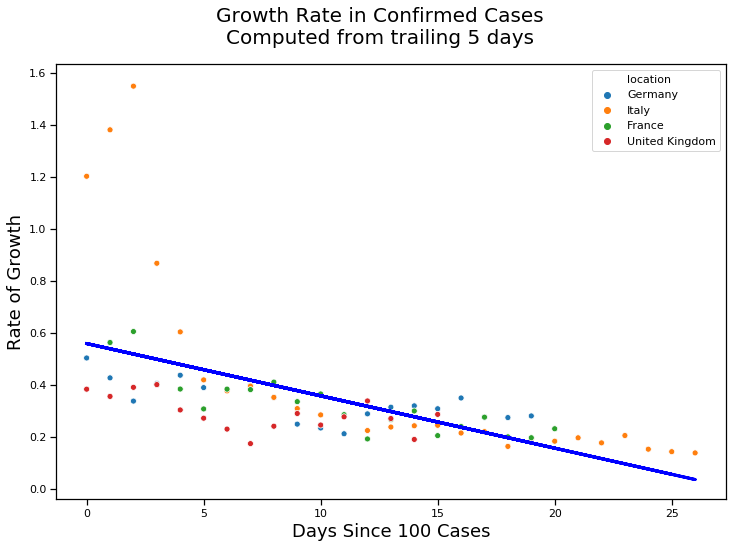

Coefficients: [[-0.02011892]] [0.5576157]
Correlation: -0.5753767048374783


In [5]:
from sklearn import  linear_model

def plot_growth_reg_100(t, y_col, subtitle=''):
    
    x = t.days_100.values.reshape(len(t), 1)
    y = t[y_col].values.reshape(len(t), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    fig, ax = plt.subplots(figsize=(12,8))
    fig.suptitle('Growth Rate in Confirmed Cases\nComputed from trailing 5 days' +("\n"+subtitle if subtitle else ''),
                 fontsize=20)

    sns.scatterplot(ax=ax, x='days_100',y=y_col, data=t, hue='location', ci=None)
    ax.plot(x, regr.predict(x), color='blue', linewidth=3)

    ax.set_xlabel('Days Since 100 Cases', fontsize=18)
    ax.set_ylabel('Rate of Growth', fontsize=18)

    plt.show()

    print('Coefficients:', regr.coef_, regr.intercept_)
    print("Correlation:", t.days_100.corr(t.rate_t5d))


    
    
t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.confirmed>100)] 
t = t[t.location.isin( ['Italy','Germany','France', 'United Kingdom'])]

plot_growth_reg_100(t,'rate_t5d')


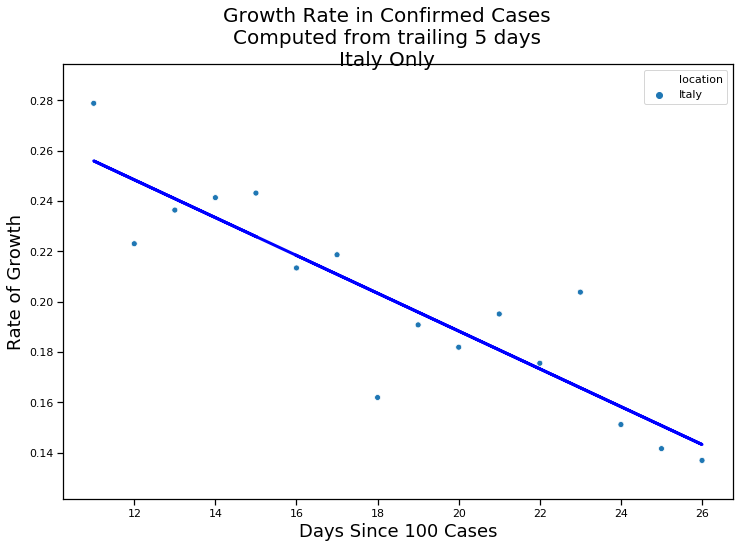

Coefficients: [[-0.00750909]] [0.33854888]
Correlation: -0.8861813384438234


In [6]:
t = confirmed_df[(confirmed_df.days_10<30) & (confirmed_df.days_100>10)] 
t = t[t.location.isin( ['Italy'])]

plot_growth_reg_100(t, 'rate_t5d', "Italy Only")

,country,province,location,date,confirmed,date_10,days_10,date_100,days_100,rate_t5d,confirmed_log
467,Germany,NaN,Germany,2020-03-10,1457,2020-02-02,37,2020-03-01,9,0.247621,7.284821
468,Germany,NaN,Germany,2020-03-11,1908,2020-02-02,38,2020-03-01,10,0.232823,7.554335
469,Germany,NaN,Germany,2020-03-12,2078,2020-02-02,39,2020-03-01,11,0.210653,7.639642
470,Germany,NaN,Germany,2020-03-13,3675,2020-02-02,40,2020-03-01,12,0.287196,8.209580
471,Germany,NaN,Germany,2020-03-14,4585,2020-02-02,41,2020-03-01,13,0.312763,8.430763


Text(0, 0.5, 'Log Number of Cases')

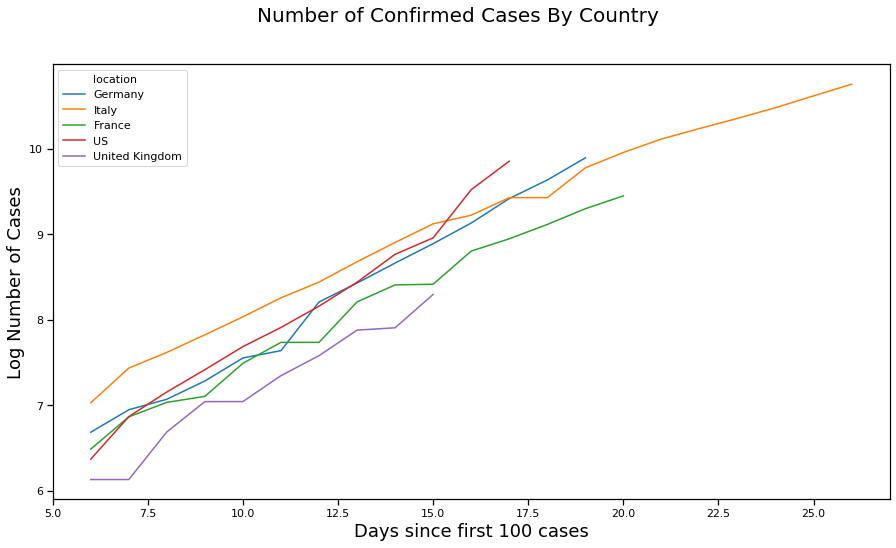

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Number of Confirmed Cases By Country', fontsize=20)

t = confirmed_df[(confirmed_df.days_100<30) & (confirmed_df.days_100>5)] 
t = t[t.location.isin( ['Italy','US','Germany','France', 'United Kingdom'])]

display(t.head())
sns.lineplot(ax=ax, x='days_100',y='confirmed_log', data=t, hue='location', ci=None)
ax.set_xlabel('Days since first 100 cases', fontsize=18)
ax.set_ylabel('Log Number of Cases', fontsize=18)

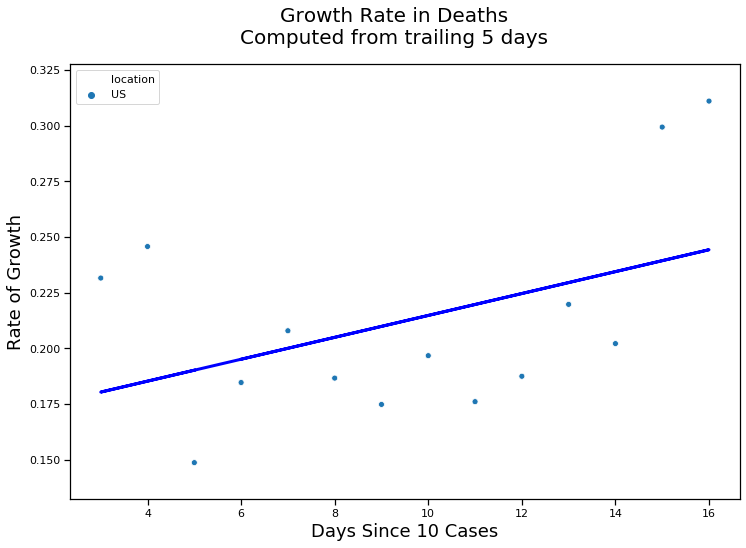

Coefficients: [[0.00491724]] [0.1656153]
Correlation: 0.4429736358628093


In [13]:


def plot_growth_reg_10(t, y_col, subtitle=''):
    
    t = t.dropna(subset=[y_col,'days_10'])
    
    x = t.days_10.values.reshape(len(t), 1)
    y = t[y_col].values.reshape(len(t), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    fig, ax = plt.subplots(figsize=(12,8))
    fig.suptitle('Growth Rate in Deaths\nComputed from trailing 5 days' +("\n"+subtitle if subtitle else ''),
                 fontsize=20)

    sns.scatterplot(ax=ax, x='days_10',y=y_col, data=t, hue='location', ci=None)
    ax.plot(x, regr.predict(x), color='blue', linewidth=3)

    ax.set_xlabel('Days Since 10 Cases', fontsize=18)
    ax.set_ylabel('Rate of Growth', fontsize=18)

    plt.show()

    print('Coefficients:', regr.coef_, regr.intercept_)
    print("Correlation:", t.days_10.corr(t.rate_t5d))

death_df = pkg.resource('deaths').dataframe()
    
t = death_df[(death_df.days_10>2) & (death_df.days_10<30)] 
t = t[t.location.isin( ['US'])]
    
plot_growth_reg_10(t,'rate_t5d')